In [2]:
!pip install -U numpy
!pip install git+https://github.com/ourownstory/neural_prophet.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.4 MB/s eta 0:00:00
  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-1fzi85fq
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-1fzi85fq
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 23543560b4ed278e84d1fd0f119d332342336d0d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached captum-0.7.0-py3-none-any.whl (1.3 MB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 14.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux

Neural Prophet
---
Unlike `Prophet`, NeuralProphet propvides the model to quantile prediction and Coformation Simulation for Time Series Probabilistic Forecasting”.

1. [src](https://medium.com/@dataman-ai/conformal-predictions-for-time-series-probabilistic-forecasting-2a892377bd5c)
2. [Kaggle data](https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike-sharing-daily.csv)



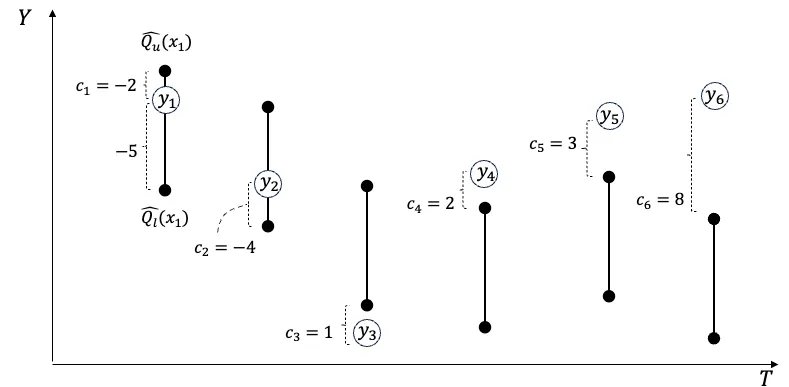

In [30]:
from IPython.display import Image
Image("cqr1.png")

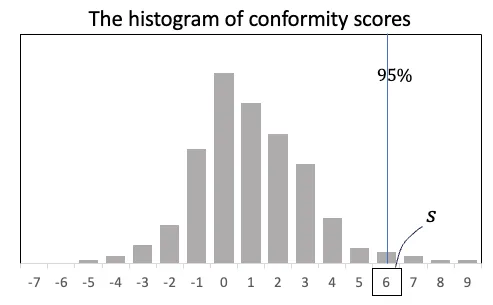

In [31]:
Image("cqr2.png")

Conformalized Quantile Regression (CQR).
---

CQR$_t$ = $[\hat Q_l(X_t)-s, \hat Q_u(X_t)+s]$  



In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import logging
import warnings
logging.getLogger('prophet').setLevel(logging.ERROR)

warnings.filterwarnings("ignore")




In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = '/content/gdrive/MyDrive/2023/2023-2-Python-AI/data'
data = pd.read_csv(path + '/bike-sharing-daily.csv')

In [7]:
# convert string to datetime64
data["ds"] = pd.to_datetime(data["dteday"])
df = data[['ds','cnt']]
df.columns = ['ds','y']

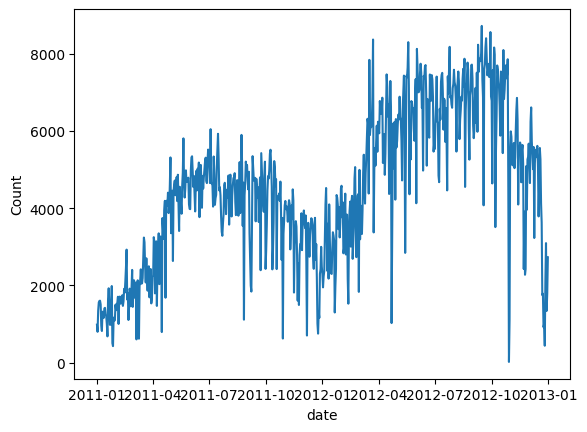

In [26]:
# create line plot of sales data
plt.plot(data['ds'], data["cnt"])
plt.xlabel("date")
plt.ylabel("Count")
plt.show()

In [11]:
from neuralprophet import NeuralProphet, set_log_level

quantile_list=[0.05,0.1,0.5,0.9,0.95 ]
# Model and prediction
m = NeuralProphet(
    quantiles=quantile_list,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
m = m.add_country_holidays("US")
m.set_plotting_backend("matplotlib")  # Use matplotlib

df_train, df_test = m.split_df(df, valid_p=0.2)
metrics = m.fit(df_train, validation_df=df_test, progress="bar")
metrics.tail()

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INF

Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
125,1174.198853,1515.914673,0.154323,0.0,125,600.221985,801.800781,0.034855,0.0
126,1172.576050,1515.822266,0.154378,0.0,126,610.898438,816.683533,0.035934,0.0
127,1172.243164,1514.679688,0.154068,0.0,127,602.064575,815.346497,0.035467,0.0
128,1175.471069,1515.811890,0.154242,0.0,128,600.960449,806.515259,0.034850,0.0
129,1176.528198,1516.875488,0.154588,0.0,129,611.177856,816.533142,0.035796,0.0


In [20]:
from neuralprophet import NeuralProphet
quantile_list=[0.05,0.95 ]
# Model and prediction
cqr_model = NeuralProphet(
    quantiles=quantile_list,
    #n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    # Add the autogression
    #n_lags=10,
    # Forecast the next 50 days
    #n_forecasts= 50
)
cqr_model = cqr_model.add_country_holidays("US")
cqr_model.set_plotting_backend("plotly")  # Use matplotlib

The calibration data, splitted from df_train, will be used to construct the conformity scores.

In [21]:
df_train, df_test = cqr_model.split_df(df, valid_p=0.2)
df_train, df_cal = cqr_model.split_df(df_train, freq="D", valid_p=1.0 / 11)
[df_train.shape, df_test.shape, df_cal.shape]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.829% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.829% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning 

[(532, 2), (146, 2), (53, 2)]

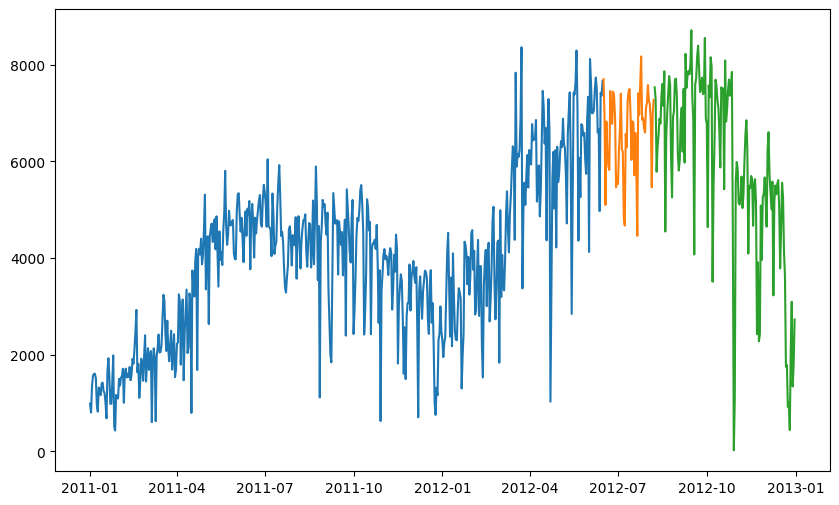

In [47]:
#import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
# Plot df_train
ax.plot(df_train.ds, df_train.y, label='Training Data')

# Plot df_cal
ax.plot(df_cal.ds, df_cal.y,  label='Calibration Data')

# Plot df_test
ax.plot(df_test.ds, df_test.y,  label='Test Data')



In [49]:
import plotly.graph_objects as go

# Create a figure object
fig = go.Figure()

# Plot df_train
fig.add_trace(go.Scatter(x=df_train['ds'], y=df_train['y'], mode='lines', opacity=0.6,name='Training Data'))

# Plot df_cal
fig.add_trace(go.Scatter(x=df_cal['ds'], y=df_cal['y'], mode='lines', name='Calibration Data'))

# Plot df_test
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'], mode='lines', name='Test Data'))

# Update layout
fig.update_layout(
    title='Visualization of Split Dataframes',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Data Sets'
)

# Show the plot
fig.show()

In [22]:
metrics = cqr_model.fit(df_train, validation_df=df_cal, progress="bar")
metrics.tail()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.812% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.812% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140
INFO:NP.config:Auto-set epochs to 140
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (17) is too small than the required number                     for

Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
135,701.246399,936.347595,0.046960,0.0,135,605.800293,826.957947,0.029684,0.0
136,701.505615,936.735962,0.046985,0.0,136,604.138733,822.210632,0.029487,0.0
137,703.276489,939.050903,0.047123,0.0,137,604.570007,823.750061,0.029606,0.0
138,702.547241,938.523132,0.047054,0.0,138,605.184021,832.778137,0.029686,0.0
139,704.019165,940.967590,0.047197,0.0,139,609.197021,833.915344,0.029865,0.0


n_historic_predictions= `number`

output owns only the last `number` history data and future prediction

In [23]:
future = cqr_model.make_future_dataframe(df, periods=50,
     n_historic_predictions=True)

# Parameter for CQR
method = "cqr"
alpha = 0.05
# Enable conformal prediction on the pre-trained models
cqr_forecast = cqr_model.conformal_predict(
    # df_test, # You can also use df_test
    future,
    calibration_df=df_cal,
    alpha=alpha,
    method=method,
    show_all_PI=True,
)
cqr_forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.113% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.113% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.113% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.872% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.872% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.872% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.872% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 50 rows at the end with NaNs in 'y' column.
INFO:NP.data.processing:Dropped 50 rows at the end with NaNs in 'y' column.


Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,yhat1 95.0% - qhat1,yhat1 5.0% + qhat1,trend,season_yearly,season_weekly,events_additive,event_Christmas Day,...,event_Martin Luther King Jr. Day,event_Memorial Day,event_New Year's Day,event_New Year's Day (observed),event_Thanksgiving,event_Veterans Day,event_Veterans Day (observed),event_Washington's Birthday,yhat1 5.0%,yhat1 95.0%
0,2011-01-01,985,490.998138,416.026947,1320.810425,2024.555664,-1331.355103,80.341209,-282.543579,0.0,...,0.0,0.0,-282.543579,0.0,0.0,0.0,0.0,0.000000,490.998138,1245.839233
1,2011-01-02,801,604.048035,176.484802,1969.186768,2032.864136,-1313.533936,-115.282242,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,251.455994,1894.215576
2,2011-01-03,1349,657.706970,383.653198,1886.407715,2041.172607,-1295.061157,-88.404510,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,458.624390,1811.436523
3,2011-01-04,1562,776.059265,666.036804,2172.216553,2049.481201,-1276.081787,2.659796,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,741.007996,2097.245361
4,2011-01-05,1600,651.026611,284.663574,2075.275879,2057.789795,-1256.754761,-150.008408,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,359.634766,2000.304810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2013-02-15,None,7687.775391,2752.022949,8496.421875,8452.555664,-897.977905,133.197311,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2826.994141,8421.451172
777,2013-02-16,None,7658.375000,2165.393555,8776.277344,8463.152344,-885.360474,80.583893,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2240.364746,8701.306641
778,2013-02-17,None,7487.332520,2418.408936,8232.993164,8473.748047,-870.845947,-115.569397,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,2493.380127,8158.021973
779,2013-02-18,None,7028.260742,2790.018555,7193.817383,8484.344727,-854.533020,-88.315781,-513.235413,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-513.235413,2864.989746,7118.846191


In [24]:
fig = cqr_model.plot(cqr_forecast,
    #plotting_backend = "matplotlib"
    plotting_backend="plotly"
)

In [25]:
fig